In [1]:
import os
import random

from ocr.helpers.plot import *
from ocr.ocr import OCR

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [2]:
ocr_model = OCR()

0.0000:                OCR


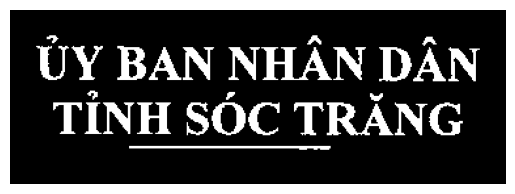

úy ban nhân dân 
tỉnh sóc trăng 
03600000032 


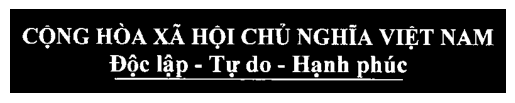

cộng hòa xã hội chú nghĩa việt nam 
độc lập - tự do - hạnh phúc 00190000099 do - 


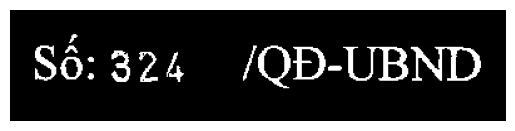

số: 324 /qđ-ubnd 


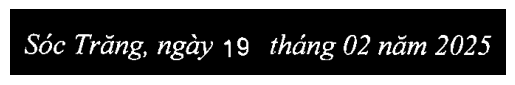

sóc trăng, ngày 19 tháng 02 năm 2025 


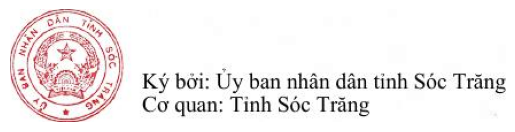

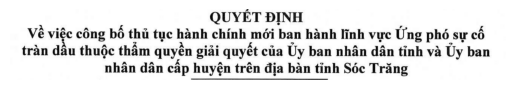

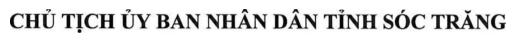

['úy ban nhân dân \ntỉnh sóc trăng \n03600000032 ',
 'cộng hòa xã hội chú nghĩa việt nam \nđộc lập - tự do - hạnh phúc 00190000099 do - ',
 'số: 324 /qđ-ubnd ',
 'sóc trăng, ngày 19 tháng 02 năm 2025 ',
 'ký bởi: ủy ban nhân dân tỉnh sóc trăng\ncơ quan: tỉnh sóc trăng\n\n',
 "quyét định\nvề việc công bố thủ tục ủnh chính mo'1 ban hành lĩnh vực ưng pho sự cố\ntràn dâu thuộc thẩm quyen giải quyết của ủy ban nhân dân tỉnh và ủy ban\nnhân dân wp huyện trên địa bàn tỉnh sóc trăng\n",
 'chủ tịch ủy ban nhán dàn tính sóc trăng\n']

In [3]:
files = os.listdir("./data/img_data")
file = random.choice(files)

ocr_model.forward(os.path.join("./data/img_data", file))